# 로지스틱 회귀

#### 시그모이드 함수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

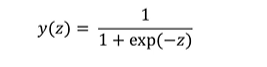

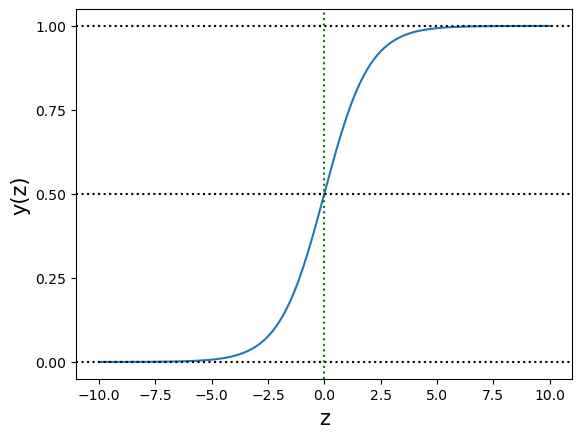

In [2]:
#### 
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 200)  # -10 ~ 10까지 200등분
y = sigmoid(z)  # 200개

plt.plot(z, y)
plt.axhline(y=0, linestyle=':', color='k')
plt.axhline(y=0.5, linestyle=':', color='k')
plt.axhline(y=1, linestyle=':', color='k')
plt.axvline(x=0, linestyle=':', color='g')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1])
plt.xlabel('z', fontsize=15)
plt.ylabel('y(z)', fontsize=15);

# 1. Logistic Regression : 악성종양 판단, 2진 분류

#### 1. 데이터 수집하기

In [10]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

#### 2. 데이터 탐색하기

In [11]:
b_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
print(len(b_cancer.feature_names))
b_cancer.feature_names

30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [19]:
# 뭐가 'malignant', 'benign'인지 모르니까 숫자를 세보자 - sort_values: Series 형태여야함
pd.Series(b_cancer.target).sort_values().sum() # 1이 357개임. 

#'malignant': 0, 'benign': 1 - 얘네 숫자는 descr에 있음

357

In [23]:
#데이터프레임으로 전환하고, 타겟(class) 추가
b_cancer_df = pd.DataFrame(data=b_cancer.data, columns=b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target

In [24]:
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
b_cancer_df.shape

(569, 31)

In [26]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 데이터 준비, 분할 및 표준화(스케일링)하기

In [27]:
from sklearn.model_selection import train_test_split

X = b_cancer.data
y = b_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
# 스케일링 전 X_train
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.185500,19.192839,92.335503,661.859045,0.096475,0.104080,0.088794,0.049479,0.180698,0.062646,...,16.359621,25.534523,107.736030,894.246985,0.132529,0.253369,0.268531,0.115221,0.289187,0.083718
std,3.598618,4.190476,24.769334,366.558262,0.013916,0.051031,0.078154,0.039216,0.028057,0.006861,...,4.965170,6.147466,34.460647,597.853882,0.022989,0.153653,0.193250,0.065688,0.063439,0.017957
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.032500,75.310000,420.350000,0.086740,0.066805,0.030385,0.020710,0.161525,0.057685,...,13.052500,20.865000,84.122500,516.425000,0.116300,0.148600,0.119100,0.065320,0.247850,0.071462
50%,13.310000,18.725000,86.140000,548.450000,0.096035,0.094035,0.062650,0.033870,0.179150,0.061715,...,14.915000,25.155000,97.455000,682.000000,0.132250,0.216000,0.229850,0.098855,0.280950,0.080075
75%,15.772500,21.597500,104.475000,779.125000,0.105400,0.128750,0.128775,0.075022,0.195400,0.065735,...,19.005000,29.452500,125.775000,1093.250000,0.145275,0.328975,0.378750,0.161300,0.318275,0.091853
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.290300,0.663800,0.207500


In [31]:
pd.options.display.float_format = '{:.3f}'.format
# 스케일링 후 X_train_scaled(평균, 표준편차))
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,...,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.005,-2.266,-1.962,-1.416,-3.155,-1.662,-1.138,-1.263,-2.666,-1.851,...,-1.700,-2.201,-1.666,-1.187,-2.672,-1.473,-1.391,-1.756,-2.094,-1.599
25%,-0.689,-0.755,-0.688,-0.660,-0.700,-0.731,-0.748,-0.735,-0.684,-0.724,...,-0.667,-0.761,-0.686,-0.633,-0.707,-0.683,-0.774,-0.761,-0.652,-0.683
50%,-0.244,-0.112,-0.250,-0.310,-0.032,-0.197,-0.335,-0.399,-0.055,-0.136,...,-0.291,-0.062,-0.299,-0.355,-0.012,-0.244,-0.200,-0.249,-0.130,-0.203
75%,0.442,0.575,0.491,0.320,0.642,0.484,0.512,0.652,0.525,0.451,...,0.533,0.638,0.524,0.333,0.555,0.493,0.571,0.702,0.459,0.454
max,3.874,3.493,3.887,5.024,3.470,4.068,4.330,3.874,4.400,5.077,...,3.969,3.910,4.168,5.627,3.923,5.243,4.334,2.669,5.912,6.902


#### 로지스틱 모델 구축

In [33]:
from sklearn.linear_model import LogisticRegression

# model
reg = LogisticRegression(max_iter=100, solver='liblinear')
#
reg.fit(X_train_scaled, y_train)
#
y_pred = reg.predict(X_test_scaled)
print(y_pred[:5])

[0 1 1 1 1]


In [34]:
np.set_printoptions(suppress=True)
y_pred_proba = reg.predict_proba(X_test_scaled)
print(y_pred_proba)
np.set_printoptions(suppress= False)

[[0.99878585 0.00121415]
 [0.02420134 0.97579866]
 [0.00100424 0.99899576]
 [0.00854873 0.99145127]
 [0.0001514  0.9998486 ]
 [0.00411138 0.99588862]
 [0.00008683 0.99991317]
 [0.00099644 0.99900356]
 [0.00006537 0.99993463]
 [0.00000268 0.99999732]
 [0.42901909 0.57098091]
 [0.0905536  0.9094464 ]
 [0.00000648 0.99999352]
 [0.64570146 0.35429854]
 [0.62202763 0.37797237]
 [0.99729619 0.00270381]
 [0.00669644 0.99330356]
 [0.99999864 0.00000136]
 [0.99997589 0.00002411]
 [1.         0.        ]
 [0.99902699 0.00097301]
 [0.98277333 0.01722667]
 [0.01382199 0.98617801]
 [0.00081598 0.99918402]
 [0.99959109 0.00040891]
 [0.00058761 0.99941239]
 [0.00004355 0.99995645]
 [0.96733725 0.03266275]
 [0.00109186 0.99890814]
 [0.99999945 0.00000055]
 [0.00005539 0.99994461]
 [0.99998299 0.00001701]
 [0.12203478 0.87796522]
 [0.99778624 0.00221376]
 [0.00000307 0.99999693]
 [0.99810045 0.00189955]
 [0.01915977 0.98084023]
 [0.99987592 0.00012408]
 [0.00894832 0.99105168]
 [0.99981112 0.00018888]


In [ ]:


#1)모델 생성

#2) 모델 훈련

#3) 평가 데이터에 대한 예측 수행


#### 생성한 모델 성능 지표 확인하기

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [41]:
y_pred = reg.predict(X_test_scaled)
#오차행렬
confusion_matrix(y_test, y_pred)

array([[ 61,   2],
       [  4, 104]])

In [39]:
#정확도, 정밀도, 재현율 지표확인
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'accuracy = {accuracy_score(y_test, y_pred)}\n',
f'precision = {precision_score(y_test, y_pred)}\n',
f'recall = {recall_score(y_test, y_pred)}')

accuracy = 0.9649122807017544
 precision = 0.9811320754716981
 recall = 0.9629629629629629


# 2. Logistic Regression: 붓꽃 데이터 , 다중 분류

#### 데이터 수집하기

#### 데이터 탐색하기

In [ ]:
#데이터프레임으로 전환하고, 타겟(class) 추가하되 범주형으로 추가 


In [ ]:
#데이터셋의 크기, 독립변수 X의 피처 정보 확인

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df, hue='species');
# hue 옵션을 주면, 첫번째 그림이 
#히스토그램에서 커널 밀도 추정(KDE) 그래프로 변경됨

In [ ]:
# 3종류인것을 추측 가능

#### 데이터 준비, 분할, 전처리

In [ ]:
# X, y 설정하기


# 데이터 분할: 붓꽃의 타겟 데이터가 
# 테스트 세트도 훈련 세트와 동일한 비율로 들어갈 수 있도록 
# 분할시 stratify옵션을 준다. 

# 훈련데이터, 테스트 데이터 스케일링



#### 로지스틱 모델 구축

In [ ]:
# 로지스틱 회귀 객체 생성
# 꽃의 종류가 3가지(이진 분류가 아님, solver, multiclass option을 주는 이유)



# 테스트 데이터를 모델에 적용하여 y_pred 구하기


#### 모델의 성능 지표 확인

In [ ]:

#오차행렬

#정확도, 정밀도, 재현율 지표확인
